# GO Annotation

following [AnnotationDbi manual](https://bioconductor.org/packages/devel/bioc/vignettes/AnnotationDbi/inst/doc/IntroToAnnotationPackages.pdf#page=8.61) and [GO.db manual](https://bioconductor.org/packages/release/data/annotation/manuals/GO.db/man/GO.db.pdf)

In [6]:
library(GO.db)

In [7]:
dmgs <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/sigDMG.goSlim.csv')
head(dmgs)

,gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
2,LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
3,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
4,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0009887,GO:0048856,anatomical structure development
5,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
6,LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,anatomical structure development


In [10]:
# looking at parent terms from the GO database
GOIDs <- dmgs$GO.IDs
AnnotationDbi::select(GO.db, keys=GOIDs, columns="TERM", keytype="GOID")

'select()' returned many:1 mapping between keys and columns



GOID,TERM
<chr>,<chr>
GO:0007219,Notch signaling pathway
NA,NA
GO:0048568,embryonic organ development
GO:0009887,animal organ morphogenesis
GO:0048666,neuron development
GO:0048666,neuron development
GO:0006357,regulation of transcription by RNA polymerase II
GO:0006357,regulation of transcription by RNA polymerase II
NA,NA


In [12]:
# Ensure GOIDs is a character vector without NA values
GOIDs <- as.character(dmgs$GO.IDs)
GOIDs <- GOIDs[!is.na(GOIDs)]

# Get the parent terms for each of your GO IDs
parent_terms <- mget(GOIDs, envir = GOBPPARENTS)

# Initialize an empty data frame to store the results
results <- data.frame(GO_ID = character(), Parent_GO_ID = character(), Parent_Term = character(), stringsAsFactors = FALSE)

# Loop through each of your GO IDs and their parent terms
for (i in seq_along(GOIDs)) {
  go_id <- GOIDs[i]
  parent_id <- parent_terms[[i]]
  
  # Get the term name for the parent ID
  parent_term <- Term(GOTERM[[parent_id[1]]])
  
  # Add the result to the data frame
  results <- rbind(results, data.frame(GO_ID = go_id, Parent_GO_ID = parent_id[1], Parent_Term = parent_term))
}

# Print the results
results

,GO_ID,Parent_GO_ID,Parent_Term
,<chr>,<chr>,<chr>
isa,GO:0007219,GO:0007166,cell surface receptor signaling pathway
part of,GO:0048568,GO:0009790,embryo development
isa1,GO:0009887,GO:0009653,anatomical structure morphogenesis
part of1,GO:0048666,GO:0030182,neuron differentiation
part of2,GO:0048666,GO:0030182,neuron differentiation
isa2,GO:0006357,GO:0006355,regulation of DNA-templated transcription
isa3,GO:0006357,GO:0006355,regulation of DNA-templated transcription
isa4,GO:0090090,GO:0030178,negative regulation of Wnt signaling pathway
isa5,GO:0006398,GO:0008334,histone mRNA metabolic process


In [13]:
colnames(results)[1] <- 'GO.IDs'
head(results)

,GO.IDs,Parent_GO_ID,Parent_Term
,<chr>,<chr>,<chr>
isa,GO:0007219,GO:0007166,cell surface receptor signaling pathway
part of,GO:0048568,GO:0009790,embryo development
isa1,GO:0009887,GO:0009653,anatomical structure morphogenesis
part of1,GO:0048666,GO:0030182,neuron differentiation
part of2,GO:0048666,GO:0030182,neuron differentiation
isa2,GO:0006357,GO:0006355,regulation of DNA-templated transcription


In [15]:
merged <- merge(dmgs, results, by = 'GO.IDs')
head(merged)

#dplyr::select(merged, process, Term, Parent_Term)

,GO.IDs,gene_id,order,name,pair_vs_HC,gene_name,process,notes,GOslim,Term,Parent_GO_ID,Parent_Term
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GO:0000012,LOC111111498,113,"uncharacterized LOC111111498, transcript variant X2",CH,,,,GO:0006281,DNA repair,GO:0006281,DNA repair
2,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly
3,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly
4,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,ribosome biogenesis,GO:0022618,protein-RNA complex assembly
5,GO:0000027,LOC111119745,27,60S ribosomal protein L10-like,"CH, HH",RPL10,translation,,GO:0042254;GO:0065003,ribosome biogenesis,GO:0022618,protein-RNA complex assembly
6,GO:0000028,LOC111127769,165,"30S ribosomal protein S11-like, transcript variant X4",CH,rps11,cytoplasmic translation,,GO:0042254;GO:0065003,protein-containing complex assembly,GO:0022618,protein-RNA complex assembly


In [16]:
length(unique(merged$Parent_Term))
length(unique(merged$Term)) # less Terms (which were the GO slim terms, than Parent Terms and they basically are the same thing ...

[1] 101

[1] 43

## ONLY unique DMGs

for **control control vs. hypoxic control**

CC vs. HC

In [17]:
library(tidyverse)

**hypoxic hypoxic vs. hypoxic control**

HH vs. HC

In [104]:
unique_HH <- merged %>%
filter(pair_vs_HC == 'HH') %>%
group_by(Term) %>%
count() %>%
mutate(Percent = round((n / sum(unique_HH$n)) * 100, 2))

unique_HH

Term,n,Percent
<chr>,<int>,<dbl>
DNA-templated transcription,18,25.35
anatomical structure development,2,2.82
carbohydrate derivative metabolic process,1,1.41
carbohydrate metabolic process,1,1.41
cell adhesion,1,1.41
cilium organization,1,1.41
cytokinesis,1,1.41
intracellular protein transport,7,9.86
lipid metabolic process,1,1.41


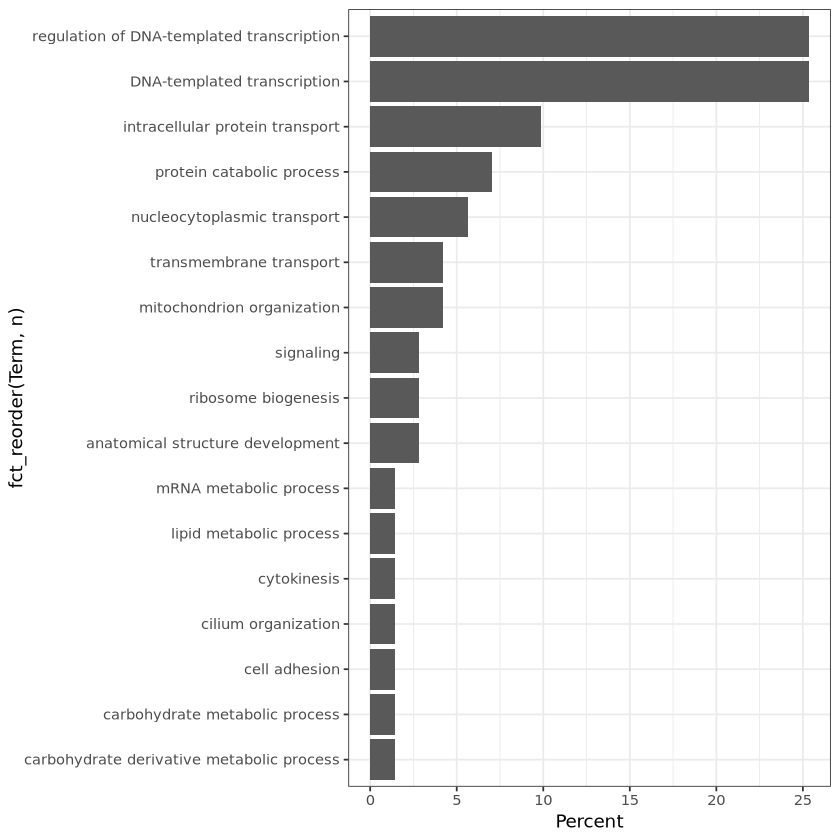

In [105]:
ggplot(unique_HH, aes(x = fct_reorder(Term,n), y = Percent)) + 
geom_col() +
coord_flip() +
theme_bw()

**control hypoxic vs. hypoxic control**

CH vs. HC

In [110]:
unique_CH <- merged %>%
filter(pair_vs_HC == 'CH') %>%
group_by(Term) %>%
count() %>%
mutate(Percent = round((n / sum(unique_CH$n)) * 100, 2)) %>%
arrange(desc(Percent))

unique_CH

Term,n,Percent
<chr>,<int>,<dbl>
DNA-templated transcription,77,24.60
regulation of DNA-templated transcription,72,23.00
signaling,25,7.99
protein catabolic process,15,4.79
intracellular protein transport,12,3.83
mitotic cell cycle,10,3.19
ribosome biogenesis,8,2.56
DNA repair,7,2.24
generation of precursor metabolites and energy,6,1.92


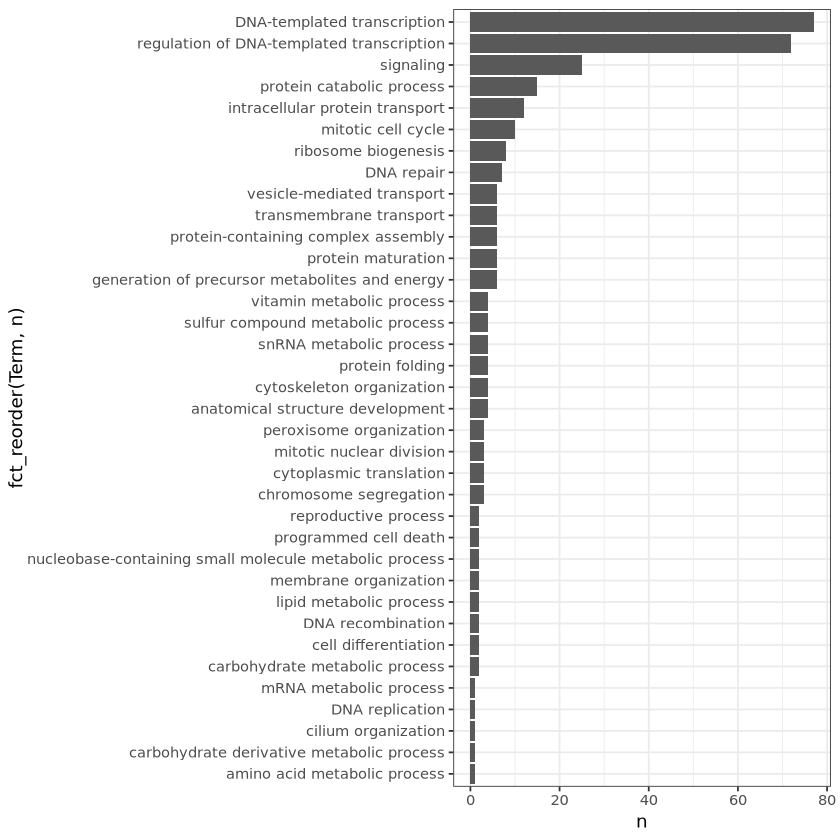

In [54]:
ggplot(unique_CH, aes(x = fct_reorder(Term,n), y = n)) + 
geom_col() +
coord_flip() +
theme_bw()

## ONLY shared DMGs


**CH vs. HC** and **HH vs. HC**

In [111]:
shared1 <- merged %>%
filter(pair_vs_HC == 'CH, HH') %>%
group_by(Term) %>%
count() %>%
mutate(Percent = round((n / sum(shared1$n)) * 100, 2)) %>%
arrange(desc(Percent))

shared1

Term,n,Percent
<chr>,<int>,<dbl>
intracellular protein transport,7,12.73
signaling,6,10.91
carbohydrate derivative metabolic process,5,9.09
mitotic cell cycle,4,7.27
nucleocytoplasmic transport,4,7.27
protein-containing complex assembly,4,7.27
anatomical structure development,3,5.45
lipid metabolic process,3,5.45
mRNA metabolic process,3,5.45


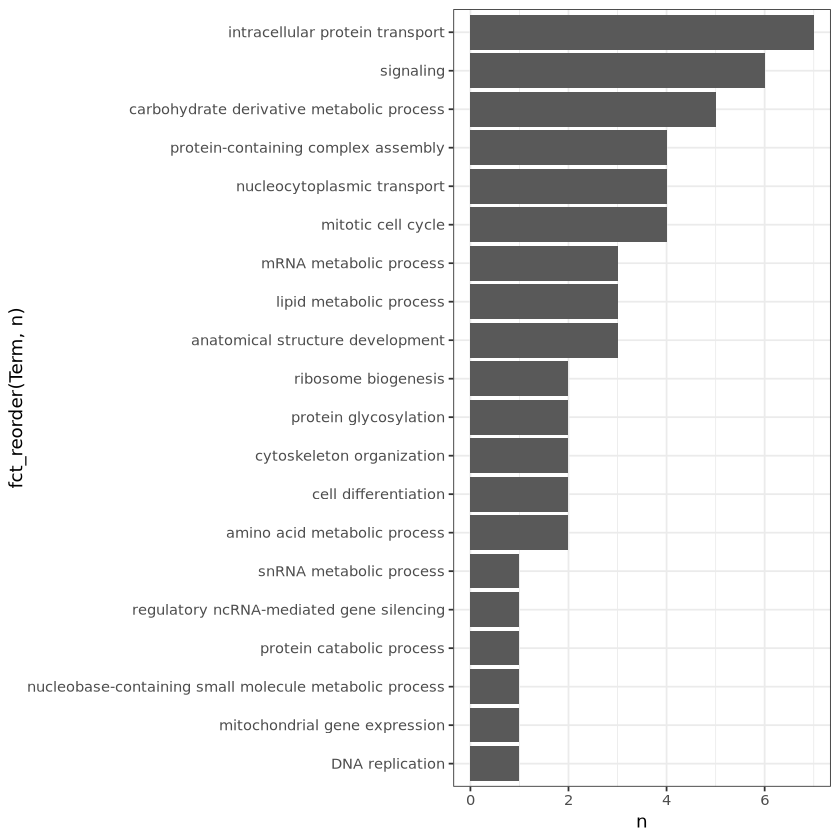

In [64]:
ggplot(shared1, aes(x = fct_reorder(Term,n), y = n)) + 
geom_col() +
coord_flip() +
theme_bw()

shared between **all three**

In [84]:
unique(dmgs$pair_vs_HC)

[1] "CH, HH, CC" "CH, HH"     "CH, CC"     "CC, HH"     "CC"        
[6] "HH"         "CH"

In [114]:
shared2 <- merged %>%
filter(pair_vs_HC == 'CH, HH, CC') %>%
group_by(Term) %>%
count() %>%
mutate(Percent = round((n / sum(shared2$n)) * 100, 2)) %>%
arrange(desc(Percent))

shared2

Term,n,Percent
<chr>,<int>,<dbl>
DNA-templated transcription,14,38.89
regulation of DNA-templated transcription,14,38.89
anatomical structure development,4,11.11
cell differentiation,2,5.56
signaling,2,5.56


so I'm getting tripped up on this because there's a lot of overlap (one gene can be involved in numerous processes), and I've flattened out the GOslim file so there's one bit of info per row, meaning there's not multiple GO terms/names in the same row for a single gene, so a gene will have multiple rows. 

We see a problem with that here, because obviously we only have 6 genes that are shared between all three pairs, 

In [122]:
all.shared <- filter(dmgs, dmgs$pair_vs_HC == 'CH, HH, CC') 
unique(all.shared$gene_id)

all.shared %>%
group_by(gene_id)

[1] "LOC111117760" "LOC111119327" "LOC111123492" "LOC111124674" "LOC111129146"
[6] "LOC111133438"

gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0009887,GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355,DNA-templated transcription
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355,regulation of DNA-templated transcription
LOC111124674,4,"gamma-glutamyltranspeptidase 1-like, transcript variant X1","CH, HH, CC",GGT1,"proteolysis, metabolisis, immune response, spermatogenesis",other are from human homolog,NA,NA,NA


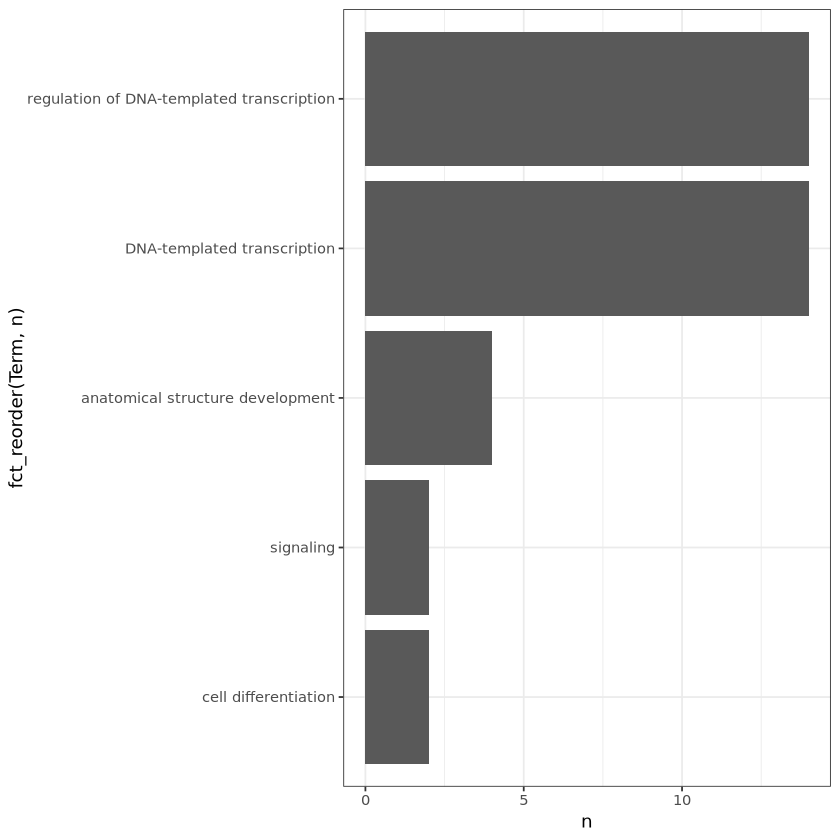

In [86]:
ggplot(shared2, aes(x = fct_reorder(Term,n), y = n)) + 
geom_col() +
coord_flip() +
theme_bw()

**CC vs. HC** and **HH vs. HC**

In [61]:
unique(merged$pair_vs_HC)

[1] "CH"         "CH, HH"     "HH"         "CH, HH, CC" "CC, HH"    
[6] "CC"

In [62]:
shared2 <- merged %>%
filter(pair_vs_HC == 'CC, HH') %>%
group_by(Term) %>%
count()

shared2

Term,n
<chr>,<int>
vesicle-mediated transport,1


### somewhat unrelated to surrounding code
curious how many DMGs 1) do not match to a GO term and 2) are uncharacterized

In [73]:
dim(dmgs[is.na(dmgs$GO.IDs),])

dim(dmgs)

[1] 123  10

[1] 299  10

In [74]:
123/299 # percent of dmgs without matches for GO terms

[1] 0.4113712

In [82]:
dmgs %>%
  filter(grepl("uncharacterized", name)) %>% # pull out anything that is uncharacterized
dim() # 55 genes are uncharacterized

[1] 55 10

In [83]:
55/299

[1] 0.1839465

**shared between:**

CH vs. HC and CC vs. HC

(for whatever reason, this is not showing up in the big dmgs df...

In [42]:
cc.hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_CC_HC_genes.csv')
ch.hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_CH_HC_genes.csv')

head(cc.hc)
head(ch.hc)

,X,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,LOC111103344,497.52024,-1.193080,0.2105031,-4.480123,7.460015e-06,0.01869231,"uncharacterized LOC111103344, transcript variant X7"
2,2,LOC111115023,20.27520,-1.349383,0.2740700,-4.011321,6.038007e-05,0.04126154,uncharacterized LOC111115023
3,3,LOC111117745,123.41704,-1.135814,0.2070067,-4.279157,1.876021e-05,0.02350342,"uncharacterized LOC111117745, transcript variant X5"
4,4,LOC111117760,138.87250,-1.494878,0.2901102,-4.291052,1.778290e-05,0.02350342,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3"
5,5,LOC111118022,19.27594,-1.664142,0.3486511,-4.056038,4.991215e-05,0.03751897,"exocyst complex component 7-like, transcript variant X1"
6,6,LOC111119327,13.31739,-1.507178,0.3154716,-3.985075,6.745881e-05,0.04225732,"calcyphosin-like protein, transcript variant X3"


,X,symbol,baseMean,log2FC,lfcSE,stat,pvalue,padj,name
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,LOC111099548,42.98619,-1.2672684,0.2026166,-5.020656,5.149523e-07,0.0003099498,kinesin-like protein KIF17
2,2,LOC111099571,31.11937,-1.4181929,0.2861630,-4.082264,4.459915e-05,0.0069725275,histone RNA hairpin-binding protein-like
3,3,LOC111099585,36.32548,0.9854391,0.2091056,3.517070,4.363394e-04,0.0332446433,lys-63-specific deubiquitinase BRCC36-like
4,4,LOC111099930,35.09830,-1.1981548,0.2270953,-4.175140,2.978035e-05,0.0051868387,"uncharacterized LOC111099930, transcript variant X1"
5,5,LOC111099978,37.23914,1.1530905,0.2612132,3.457293,5.456316e-04,0.0390971051,"oncoprotein-induced transcript 3 protein-like, transcript variant X1"
6,6,LOC111100608,22.90296,-1.4622657,0.2851646,-4.251109,2.127149e-05,0.0040010349,DDRGK domain-containing protein 1-like


In [43]:
ch.cc.shared <- ch.hc[ch.hc$symbol %in% cc.hc$symbol, ]

hh.hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/sig_DMGs/sig_HH_HC_genes.csv')

shared3 <- ch.cc.shared[!ch.cc.shared$symbol %in% hh.hc$symbol,]$symbol
shared3 

[1] "LOC111103344" "LOC111132100" "LOC111133874"

In [44]:
matchGO <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/GO_terms/gene2GOslim.csv')
head(matchGO)

,GO.IDs,GOslim,Term,gene_id
,<chr>,<chr>,<chr>,<chr>
1,GO:0000002,GO:0007005,mitochondrion organization,LOC111135903
2,GO:0000012,GO:0006281,DNA repair,LOC111136704
3,GO:0000012,GO:0006281,DNA repair,LOC111111498
4,GO:0000012,GO:0006281,DNA repair,LOC111128516
5,GO:0000012,GO:0006281,DNA repair,LOC111135354
6,GO:0000012,GO:0006281,DNA repair,LOC111128425


In [46]:
dim(matchGO)

[1] 16024     4

In [45]:
matchGO[shared3 %in% matchGO$gene_id,]

GO.IDs,GOslim,Term,gene_id
<chr>,<chr>,<chr>,<chr>


# new approach

I think I'm having problems with redundancy in my gene categories, so I only want to keep unique GO term entries for each gene ID to avoid this issue

For example: one gene may have multiple, related GO terms and so they all say transcription, inflating results when in reality, it's just one gene that is involved in transcription instead of 50% of the genes aligning with transcription (because it's so redundant)

In [133]:
no_dupes <- dmgs %>%
  group_by(gene_id) %>%
  distinct(Term, .keep_all = TRUE)

head(no_dupes)

gene_id,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim,Term
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
LOC111117760,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052,signaling
LOC111119327,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA,NA
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856,anatomical structure development
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856,cell differentiation
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355,DNA-templated transcription
LOC111123492,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355,regulation of DNA-templated transcription


In [134]:
write.csv(no_dupes, '/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/noDupes_sigDMGs.csv', row.names=FALSE)

did some manipulation in excel - if a gene had multiple lines of similarly related categories (like metabolism or transcription), I collapsed them to further help with redundancy
                                                    

In [25]:
noDupe <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/noDupes_sigDMGs2.csv')
head(noDupe)

,gene_id,X,Term,order,name,pair_vs_HC,gene_name,process,notes,GO.IDs,GOslim
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,LOC111117760,signaling,signaling,1,"disintegrin and metalloproteinase domain-containing protein 10-like, transcript variant X3","CH, HH, CC",ADAM10,"cell signaling, adhesion, migration",,GO:0007219,GO:0023052
2,LOC111119327,,NA,2,"calcyphosin-like protein, transcript variant X3","CH, HH, CC",CAPSL,calcium ion binding,,NA,NA
3,LOC111123492,developmental process,anatomical structure development,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048568,GO:0048856
4,LOC111123492,developmental process,cell differentiation,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0048666,GO:0030154;GO:0048856
5,LOC111123492,transcription,DNA-templated transcription,3,"pre-B-cell leukemia transcription factor 1-like, transcript variant X11","CH, HH, CC",PBX1,regulates embryonic development and cellular differention,,GO:0006357,GO:0006351;GO:0006355
6,LOC111124674,,NA,4,"gamma-glutamyltranspeptidase 1-like, transcript variant X1","CH, HH, CC",GGT1,"proteolysis, metabolisis, immune response, spermatogenesis",other are from human homolog,NA,NA


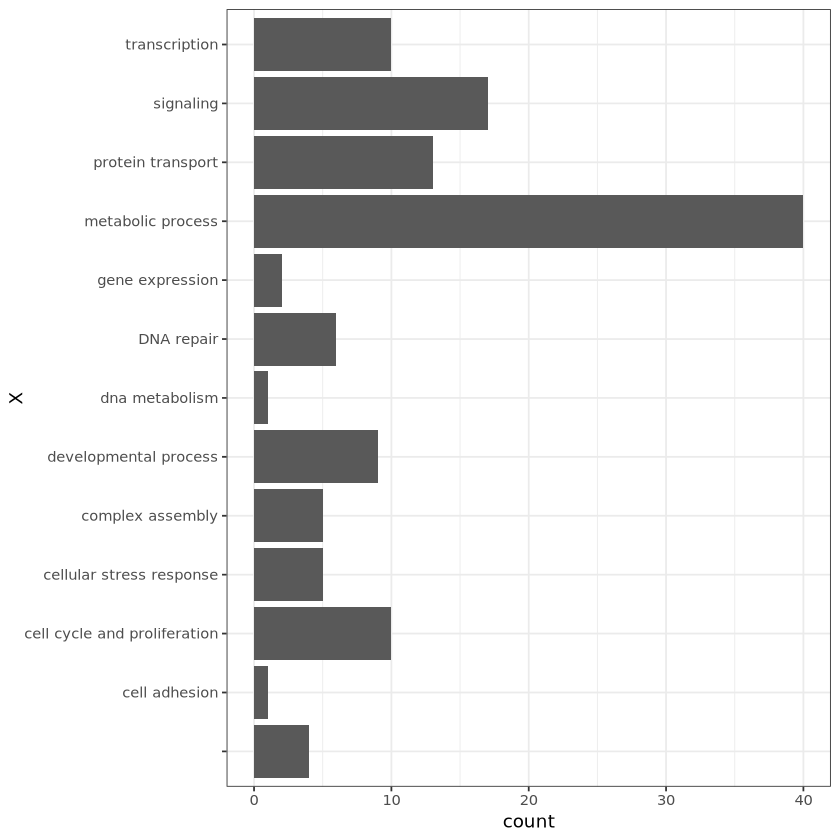

In [31]:
# all sig. DMGs with HC
ggplot(na.omit(noDupe), aes(x=X)) +
geom_bar(stat = 'count') + 
coord_flip() + 
theme_bw()

### only unique DMGs for HH vs. HC (21 dmgs)

In [40]:
HH_unique <- noDupe %>%
filter(pair_vs_HC == 'HH') %>%
count(Term) %>%
mutate(Percent = round((n / sum(n)) * 100, 2)) %>%
arrange(desc(n))

HH_unique

Term,n,Percent
<chr>,<int>,<dbl>
NA,7,30.43
DNA-templated transcription,2,8.70
intracellular protein transport,2,8.70
protein catabolic process,2,8.70
signaling,2,8.70
anatomical structure development,1,4.35
carbohydrate derivative metabolic process,1,4.35
cell adhesion,1,4.35
cilium organization,1,4.35


### only unique for CH vs. HC (136 dmgs)

In [47]:
CH_unique <- noDupe %>%
filter(pair_vs_HC == 'CH') %>%
count(Term) %>%
mutate(Percent = round((n / sum(n)) * 100, 2)) %>%
arrange(desc(n))

CH_unique

Term,n,Percent
<chr>,<int>,<dbl>
NA,79,50.97
signaling,10,6.45
DNA-templated transcription,7,4.52
protein catabolic process,7,4.52
DNA repair,5,3.23
intracellular protein transport,4,2.58
ribosome biogenesis,4,2.58
generation of precursor metabolites and energy,3,1.94
mitotic cell cycle,3,1.94


In [51]:
CH_unique %>%
  mutate(Term = case_when(
    str_detect(Term, "metabolic") ~ "metabolic processes",
    TRUE ~ Term
  )) %>%
  group_by(Term) %>%
  summarise(n = sum(n), Percent = sum(Percent)) %>%
arrange(desc(n))

Term,n,Percent
<chr>,<int>,<dbl>
NA,79,50.97
signaling,10,6.45
metabolic processes,9,5.84
DNA-templated transcription,7,4.52
protein catabolic process,7,4.52
DNA repair,5,3.23
intracellular protein transport,4,2.58
ribosome biogenesis,4,2.58
generation of precursor metabolites and energy,3,1.94


In [59]:
dmgs %>%
  filter(pair_vs_HC == 'CH')  %>%
  select(gene_id, Term) %>%
  distinct() %>% 
  mutate(Term = case_when(
    str_detect(Term, "metabolic") ~ "metabolic processes",
    TRUE ~ Term
  )) %>%
  count(Term) %>%
  mutate(Percent = round((n / sum(n)) * 100, 2)) %>%
  arrange(desc(n))

Term,n,Percent
<chr>,<int>,<dbl>
NA,79,47.02
metabolic processes,11,6.55
signaling,10,5.95
DNA-templated transcription,7,4.17
protein catabolic process,7,4.17
regulation of DNA-templated transcription,6,3.57
DNA repair,5,2.98
intracellular protein transport,4,2.38
ribosome biogenesis,4,2.38


In [62]:
dmgs %>%
filter(pair_vs_HC == 'CH') %>%
  filter(grepl("uncharacterized", name)) %>% # pull out anything that is uncharacterized
dim() # 37 genes are uncharacterized

[1] 37 10

### shared between HH vs. HC and CH vs. HC

In [64]:
shared3 <- noDupe %>%
filter(pair_vs_HC == 'CH, HH') %>%
count(Term) %>%
mutate(Percent = round((n / sum(n)) * 100, 2)) %>%
arrange(desc(n))

shared3

Term,n,Percent
<chr>,<int>,<dbl>
NA,30,55.56
signaling,3,5.56
amino acid metabolic process,2,3.70
carbohydrate derivative metabolic process,2,3.70
intracellular protein transport,2,3.70
lipid metabolic process,2,3.70
mRNA metabolic process,2,3.70
protein-containing complex assembly,2,3.70
DNA replication,1,1.85


In [66]:
shared3 %>%
  mutate(Term = case_when(
    str_detect(Term, "metabolic") ~ "metabolic processes",
    TRUE ~ Term
  )) %>%
  group_by(Term) %>%
  summarise(n = sum(n), Percent = sum(Percent)) %>%
arrange(desc(n))

Term,n,Percent
<chr>,<int>,<dbl>
NA,30,55.56
metabolic processes,9,16.65
signaling,3,5.56
intracellular protein transport,2,3.70
protein-containing complex assembly,2,3.70
DNA replication,1,1.85
anatomical structure development,1,1.85
cytoskeleton organization,1,1.85
mitochondrial gene expression,1,1.85
